In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_green_channel(image):
    return image[:, :, 1]

def compute_cfa_interpolation_residual(green_channel):
    kernel = np.array([[0, 0.25, 0],
                       [0.25, -1, 0.25],
                       [0, 0.25, 0]])

    residual = cv2.filter2D(green_channel.astype(np.float32), -1, kernel)

    return residual

def detect_manipulation(image):
    green_channel = extract_green_channel(image)

    residual = compute_cfa_interpolation_residual(green_channel)

    residual_energy = cv2.GaussianBlur(residual**2, (5, 5), 0)

    residual_energy_norm = (residual_energy - residual_energy.min()) / (residual_energy.max() - residual_energy.min())

    threshold = 0.1
    mask = residual_energy_norm > threshold

    return mask, residual_energy_norm


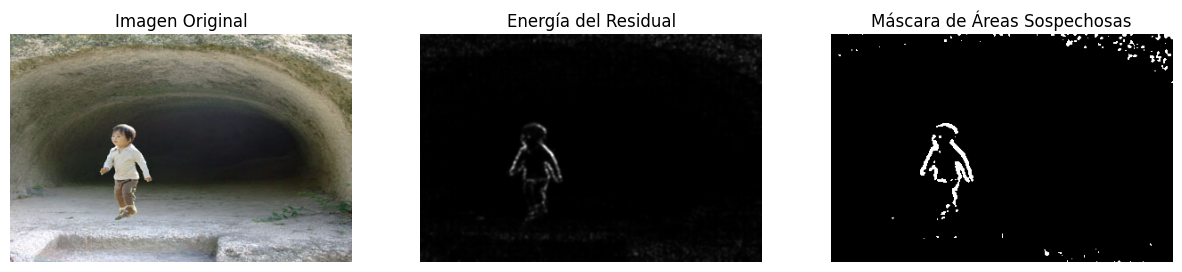

In [7]:
image_path = "D:/dataset--ml/CASIA2-Train/Tp/Tp_D_CRN_M_N_art10115_cha00086_11526.jpg"  
image = cv2.imread(image_path)

if image is None:
    print("No se pudo cargar la imagen. Verifica la ruta.")

else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask, residual_energy = detect_manipulation(image_rgb)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(residual_energy, cmap='gray')
    plt.title('Energía del Residual')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara de Áreas Sospechosas')
    plt.axis('off')

    plt.show()